# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)


<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:

<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)
# Start tracking running time
start = dt.datetime.now()

### ToDo 1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>
Use your dataframe to answer the questions in Quiz 1 of the classroom.



**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the below cell to find the number of rows in the dataset.

In [3]:
#the number of rows in the dataset:
df.shape

(294478, 5)

In [4]:
df.shape[0]

294478

**c.**The number of unique users in the dataset.

In [5]:
#Number of unique users in the dataset:
df.user_id.nunique()

290584

**d.** The proportion of users converted.

In [6]:
# Proportion of conversion in the dataset :
df.query('converted == 1')['converted'].count() / df.shape[0]

0.11965919355605512

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [7]:
# Number of times when the "group" is treatment but "landing_page" is not a new_page.
df.query('group == "treatment" and landing_page != "new_page"').count()[0]

1965

In [8]:
# Number of times when the "group" is control but "landing_page" is new_page.
df.query('group != "treatment" and landing_page == "new_page"').count()[0]

1928

In [9]:
df.query('(group == "treatment" and landing_page != "new_page") or (group != "treatment" and landing_page == "new_page")')['user_id'].count()
# 1965+1928

3893

**f.** Do any of the rows have missing values?

In [10]:
df.isnull().sum().sum()

0

In [11]:
df.isnull().values.any()

False

 null values in the dataset

### ToDo 1.2  


2. For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page. Use **Quiz 2** in the classroom to provide how we should handle these rows.

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz. Store your new dataframe in **df2.**

In [12]:
df2 = df.drop(df.query('(group == "treatment" and landing_page != "new_page") or (group != "treatment" and landing_page == "new_page") or (group == "control" and landing_page != "old_page") or (group != "control" and landing_page == "old_page")').index)

In [13]:
df2.shape

(290585, 5)

In [14]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### ToDo 1.3 

3. Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_ids** are in **df2**?


In [15]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2.** What is it?

In [16]:
df2[df2.duplicated(['user_id'], keep=False)]['user_id']

1899    773192
2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat user_id?

In [17]:
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove one of the rows with a duplicate user_id, but keep your dataframe as df2.

In [18]:
#df2.drop(1899, inplace=True)
df2.drop_duplicates(subset=['user_id','group','landing_page'],keep='first',inplace=True)
#df2.user_id.drop_duplicates(inplace = True)
df2.user_id.duplicated().sum()


0

In [19]:
df2.query('user_id==773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


### ToDo 1.4  
4. Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?


In [20]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control group`, what is the probability they converted?

In [21]:
control_convert = df2.query('group == "control"').converted.mean()
control_convert

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [22]:
treatment_convert = df2.query('group == "treatment"').converted.mean()
treatment_convert

0.11880806551510564

In [23]:
obs_diff = treatment_convert-control_convert
obs_diff

-0.0015782389853555567

d. What is the probability that an individual received the new page?

In [24]:
df2.query('landing_page == "new_page"').user_id.count() / df2.shape[0]

0.5000619442226688

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new treatment group users lead to more conversions.

In the previous question, we only look at the probability that an individual received the new page regardless of the groups. That is, while the half individuals reveive the new page, other nearly half individuals receive the old page as well. On the other hand, there is a small fraction between two control groups. Both the probabilty of the control and treatment groups is 0.12. **So I think there is no precise evidence that one page leads to more conversions.**


<a id='ab_test'></a>
## Part II - A/B Test

>Since just calculated that the "converted" probability (or rate) for the old page is slightly higher than that of the new page, we will assume that the old page is better unless the new page proves to be definitely better at alpha (Type I error rate): 5%


**Hypothesis Test:**
>$$H_{0}:P_{new}-P_{old} \leq 0 $$
>$$H_{1}:P_{new}-P_{old} > 0 $$

In [25]:
df2.landing_page.value_counts()

new_page    145310
old_page    145274
Name: landing_page, dtype: int64



a. What is the **convert rate** for $p_{new}$ under the null? 

In [26]:
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? 

In [27]:
p_old = p_new
p_old

0.11959708724499628

c. What is $n_{new}$?

In [28]:
n_new = df2.query('landing_page == "new_page"').count()[0] 
n_new

145310

d. What is $n_{old}$?

In [29]:
n_old = df2.query('landing_page == "old_page"').count()[0]
n_old

145274

this one was tricky. But here we are looking at a null where there is no difference in conversion based on the page, which means the conversions for each page are the same.

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null. Store these $n_{new}$ 1's and 0's in **new_page_converted.**

In [30]:
## simulate n_old transactions with a convert rate of p_new under the null

#new_page_converted = np.random.binomial(1, p_new, n_new)
#new_page_converted


# Simulate a Sample for the treatment Group
new_page_converted = np.random.choice([0,1], size=n_new, p=[(1-p_new) ,p_new])
new_page_converted.mean()



0.1190971027458537

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null. Store these $n_{old}$ 1's and 0's in **old_page_converted.**

In [31]:
# simulate n_old transactions with a convert rate of p_old under the null
#old_page_converted = np.random.binomial(1, p_old, n_old)
#old_page_converted

# Simulate a Sample for the control Group
old_page_converted=np.random.choice([0,1], size=n_old, p=[(1-p_old), p_old])
old_page_converted.mean()

0.12045513994245358

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [32]:
# differences computed in from p_new and p_old
p_new = new_page_converted.mean()
p_old = old_page_converted.mean()
actual_diff = p_new - p_old
actual_diff

-0.0013580371965998816

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts a. through g. above. Store all 10,000 values in p_diffs.

In [33]:
p_diffss=[]
new_converted_simul = np.random.binomial(n_new, p_new,  10000)/ n_new
old_converted_simul = np.random.binomial(n_old, p_old,  10000)/ n_old
p_diffss =new_converted_simul - old_converted_simul


Essentially, we are applying the null proportion to the total size of each page using the binomial distribution. 
 Each element, for example, innp.random.binomial(n_new, p_new, 10000) results in an array with values like [17262, 17250, 17277...]. 
 This array is 10000 elements large When we divide it by n_new, Python broadcasts n_new for each element and we return a proportion for each element.
 This is essentially is simulating, 10000, the new page conversion rate.

i. Plot a histogram of the p_diffs. Does this plot look like what you expected? Use the matching problem in the classroom to assure you fully understand what was computed here.

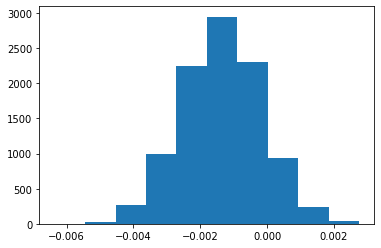

In [34]:
plt.hist(p_diffss);

In [35]:
# save p_diffs for later use
np.save('p_diffss', p_diffss)


The sample size of df2 is large enough that our sampling distribution is bell shaped. As we observed the actual difference in $p_{new} - p_{old}$, based on the confidence interval, we have an equal difference in means between old and new pages. The normal distribution is small, that is, it's between (-0.05 and +0.05).

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [36]:
greater_than_difference = []
for i in range(len(p_diffss)):
    if p_diffss[i] > obs_diff:
        greater_than_difference.append(p_diffss[i])

In [37]:
len(greater_than_difference) / len(p_diffss)

0.5737

In [38]:
# Simulate distribution under the null hypothesis
null_vals = np.random.normal(0, np.std(p_diffss), 10000)


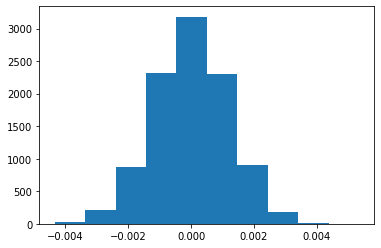

In [39]:
# Plot the null distribution
plt.hist(null_vals);

In [40]:
# Compute p-value
# h_alternative : p_new > p_old
p_value = (null_vals > obs_diff).mean()
p_value

0.9113

The actual difference is captured in the population. Since**pvalue >0.05**, we would fail to reject the null hypothesis. 90% of values from our null distribution fall to the right our actual difference. The old page has a higher probability of convertion rate than the new page so I can't reject the null hypothesis.

l. We could also use a built-in to achieve similar results. Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let n_old and n_new refer the the number of rows associated with the old page and new pages, respectively.


In [41]:
import statsmodels.api as sm
# the number of conversions for each page
convert_old = df2.query('landing_page == "old_page"').converted.sum()  # old page == control group
convert_new = df2.query('landing_page == "new_page"').converted.sum()  # new page == treatment group
# the number of individuals who received each page
n_old = df2.query('landing_page == "old_page"')['user_id'].nunique()
n_new = df2.query('landing_page == "new_page"')['user_id'].nunique()

In [42]:
convert_old , n_old

(17489, 145274)

In [43]:
convert_new, n_new

(17264, 145310)

m. Now use stats.proportions_ztest to compute your test statistic and p-value. Here is a helpful link on using the built in.

In [44]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative = 'larger')

In [45]:
z_score, p_value

(-1.3109241984234394, 0.9050583127590245)

In [46]:
from scipy.stats import norm
 # Tells us how significant our z-score is
norm.cdf(z_score)

0.09494168724097551

In [47]:
 # Tells us what our critical value at 95% confidence is
norm.ppf(1-(0.05/2))

1.959963984540054

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages? Do they agree with the findings in parts j. and k.?

The calculated p-value using proportions_ztest is 0.9. As we know that 90% of values from our null distribution fall to the right or are above our actual mean in parts j and k. In this case, we would fail to reject the null hypothesis as 0.9 > 0.05.

In other words, since the z-score of -1.3109241984234394 does not exceed the critical value of 0.9050583127590245, we would fail to reject the null hypothesis thatthe old page has a better or equal converted rate than the new page.


In [48]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\mariam atef\appdata\local\programs\python\python37-32\python.exe -m pip install --upgrade pip' command.


<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

Since we only need to yield two different output values that are categorical. We can perform a Logistic Regression model to compare two dummy variables rather than quantitative.

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:


In [49]:
# Adding an intercept column :
df2['intercept'] = 1

In [50]:
df2['ab_page'] = pd.get_dummies(df2.group)['treatment']    # Transform group column to using get_dummies and drop control column
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [51]:
import statsmodels.api as sm

In [52]:
# Instantiate and fitting the regression model (statsmodels) on the two columns
ls = sm.Logit(df2.converted, df2[['intercept', 'ab_page']])
result = ls.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [53]:
# Summary statistics of model
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 14 Dec 2021   Pseudo R-squ.:               8.077e-06
Time:                        11:59:26   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with ab_page? Why does it differ from the value you found in the Part II?

 What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the Part II?

In the Part II, we assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5% (i.e. 0.05). We look at an one-tail test to test which page had a higher conversion rate with
and

hypotheses hnull and halternative the p-value was 0.9. The p-value in Part II is dependent on our alternative hypothesis as we concern with the new page is better than the old page in the entire population.

In this case, the result of the p-value of 'ab_page' is 0.19 in our logistic regression model. We only care about our explanatory variable which is ab_page. In regression mode, our null hypothesis now turns into that there is no difference between the two pages and the alternative hypothesis is that their difference is statistically different from one another. That is, logistic regression test is about a two-tail test.

f. Now, you are considering other things that might influence whether or not an individual converts. Discuss why it is a good idea to consider other factors to add into your regression model. Are there any disadvantages to adding additional terms into your regression model?
Adding additional features may reveal hidden patterns around the data.However, if these features are irrelevant, this could really hurt our model!
Since we already know that the number of old page equals to the number of control group and likewise the size of new pages is the same as the size of treatment group in the data, adding the landing_page column to our logistic regression model might not help in changing the result entirely. So we have one more column which is the timestamp column that could be another factor to influence whether or not an individual converts. The timestamp column allows us to interpret when an user views the page durin a day. The columnd could change the conversion rate by converting the time as three categorical variables such as morning, midday and evening.
Our model is now to understand how our x and y variables are related. Furthermore, we want to add more variables into our model. When adding three or more categorical variables that are highly correlated, we need to consider one potential disadavantage that we learn in the lecture, which is Multicollinearity. This might affect our hypothesis testing result to be unhealth and unreliable.


g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the countries.csv dataset and merge together your datasets on the approporiate rows. Here are the docs for joining tables.
Adding countries

In an effort to refine the model performance and trying to get a better assesment to our statistical test, **Hint:** we will add more factors to the regression model to making a better predeication as we are increasing the training data by merging the countries file and adding the effect based on which country a user lives in


In [54]:
dfcon = pd.read_csv('countries.csv')  # Read the countries file
dfcon.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [55]:
df2 = df2.merge(dfcon, on='user_id') ## Join with the df2 dataframe
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [56]:
df2[['CA', 'UK']] = pd.get_dummies(df2.country)[['CA', 'UK']]
# We select CA and UK and drop the US column to make the matrice full rank

In [57]:
df2['new_page'] = pd.get_dummies(df2.landing_page)['new_page']

In [58]:
# Create a logistic regression model with baselines as US and old_page
logit = sm.Logit(df2.converted, df2[['intercept', 'new_page', 'CA', 'UK']])
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Tue, 14 Dec 2021   Pseudo R-squ.:               2.323e-05
Time:                        11:59:30   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
new_page      -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

The predicted difference in the conversion of a page in CA as compared to the US holding other variables constant : -408.0
The predicted difference in the conversion of a page in UK as compared to the US holding other variables constant : -99.0
For every one unit increase new page, we predict the conversion of a page to decrease by 0.0149 holding all other variables constant.
The predicted converted page if the user views the old page in the US. = -19893
Let's calculate VIF value in order to determine whether we have multicollinearity in our model.

In [59]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X = dmatrices('converted ~ new_page + CA + UK', df2, return_type='dataframe')
viif = pd.DataFrame()
viif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
viif["features"] = X.columns

In [60]:
viif

,VIF Factor,features
0,2.428940,Intercept
1,1.000006,new_page
2,1.017759,CA
3,1.017761,UK


As a result, features' values are not larger than 10 that is, we don't have multicallinearity in our model!

In [61]:
df2['CA_new'] = df2['new_page'] * df2['CA']
df2['UK_new'] = df2['new_page'] * df2['UK']

In [62]:
# Create a second logistic regression model with baselines as US and old_page
logit = sm.Logit(df2.converted, df2[['intercept', 'new_page', 'CA_new', 'UK_new', 'CA', 'UK']])
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Tue, 14 Dec 2021   Pseudo R-squ.:               3.482e-05
Time:                        11:59:34   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
new_page      -0.0206      0.014     -1.505      0.132      -0.047       0.006
CA_new        -0.0469      0.054     -0.872      0.383      -0.152       0.059
UK_new         0.0314      0.027      1.181      0.238      -0.021       0.084
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
==============================================================================
"""

Based on the results, only the intercept is statically significant. The coefficient of intereaction variables namely CA_new and UK_new are slightly different from the coefficient of new_page itself. I think adding a higher order term between page and country is useful in predicting the conversion of page.
For every one unit increase in the conversion for new page from UK, the predicted increase in convertion is by 0.0314.
For every one unit increase in the conversion for new page from CA, the predicted decrease in convertion is by -0.0469.
The predicted difference between the conversion of pages viewed from CA and from US holding all other variables constant is -0.0175.
The predicted difference between the conversion of pages viewed from UK and from US holding all other variables constant is -0.0057.

 Why does it differ from the value you found in Part II?

**HINT** In fact, you can interchange the p-values using the following formula. 1-0.19/2 = 0.9 (0.9 should be what you got in part ii). The reason lies in the fact that in part ii, we were concerned with which page had a higher conversion rate, so a one-tailed test. However, in part iii, the nature of a regression test is not concerned with which had a positive or negative change, specifically. It is concerned with if the condition had any effect at all, so a two-tailed test. You can actually see this in the formula to interchange the p-values because is essentially taking the two-tailed p-value, cutting it in half for only one of the tails, and then calculating the right side of the tail since we are concerned with which one is bigger.

### Conclusions


Based on the available evidence,**we can not reject the null hypothesis**(stating that there is no significant statistical difference related to the new page / country)for many reasons:
The p value for the hypothesis testing is greater than the alpha, So the difference between the old page and the new page is not significant and occured by chance.
In the regression model also the p value is greater than the alpha and the interaction between the countries and the pages are meaningless or don't have effect on the conversion rate.
It seems that the old page is pretty good and enough ,But I can't say If we should continue with the new page or cancel it because The dataset don't have more features.
I suggest to run the experiment longer to make the decision of whether to implement the new page or not.

There are many factors to consider when designing an A/B test and drawing conclusions based on its results. To conclude, here are some common ones to consider:
1-The best metric choice for making the ultimate decision (eg. measuring revenue vs. clicks).
2-The practical significance of a conversion rate (the cost of launching a new feature vs. the gain from the increase in conversion.

In [63]:
finish = dt.datetime.now()
duration =  finish - start
print(f'Total running time is {str(duration)[2:4]} minute, {str(duration)[5:7]} seconds')

Total running time is 00 minute, 47 seconds


In [64]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

4294967295